In [1]:
import csv
import numpy as np
from flight_optimizer import *
import itertools

In [2]:
with open('benchmarks/flow_comparaison30/results.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    a = np.array([list(map(float, line)) for line in reader])



In [3]:
a[(a[:, 7] > 0)]

array([[5.000000e-01, 1.000000e+01, 3.000000e+01, 8.000000e+00,
        1.631035e+06, 1.631042e+06, 1.631042e+06, 7.000000e+00,
        7.000000e+00, 0.000000e+00, 0.000000e+00],
       [5.000000e-01, 2.000000e+01, 3.000000e+01, 3.000000e+00,
        4.292485e+06, 4.292562e+06, 4.292562e+06, 7.700000e+01,
        7.700000e+01, 0.000000e+00, 0.000000e+00]])

In [4]:
def find_min_delta(solution: FlightSolution):
    min_gap = float('inf')
    for aircraft, flights in solution.assignment.items():
        for f1, f2 in itertools.combinations(flights, 2):
            if f2.departure_time < f1.departure_time:
                f1, f2 = f2, f1

            min_gap = min(min_gap, f2.departure_time - f1.arrival_time)

    return min_gap

In [5]:
def problem_path(d: float, p: int, h: int, test_index: int):
    return f"./data/d={d}/p={p}/h={h}/DataCplex_density={d}_p={p}_h={h}_test_{test_index}.dat"


def solution_path(d: float, p: int, h: int, test_index: int):
    return f"./data/d={d}/p={p}/h={h}/Optimal_Solution_density={d}_p={p}_h={h}_test_{test_index}.txt"

In [6]:
# D = [0.5, 0.7, 1]
# P = [10, 20, 30, 40]
# H = [7, 15, 21, 30]

# print('d\t| p\t| h\t| i\t| min_gap')
# for density, planes, horizon, index in itertools.product(D, P, H, range(10)):
#     try:
#         problem = FlightProblem.from_file(problem_path(density, planes, horizon, index))
#         solution = FlightSolution.from_file(solution_path(density, planes, horizon, index), problem)
#         min_gap = find_min_delta(solution)
#         print(f'{density}\t| {planes}\t| {horizon}\t| {index}\t| {min_gap}')
#     except Exception as e:
#         print(f'{density}\t| {planes}\t| {horizon}\t| {index}\t| {type(e)}')


In [7]:
instances = [
    (0.5, 10, 30, 8),
    (0.5, 20, 21, 1),
    (0.5, 20, 30, 3),
    (0.5, 20, 30, 5),
    (0.5, 30, 7, 1),
    (0.5, 30, 7, 5),
    (0.5, 30, 7, 7),
    (0.5, 30, 7, 8),
    (0.5, 30, 15, 2),
]

In [8]:
reporter = Reporter()

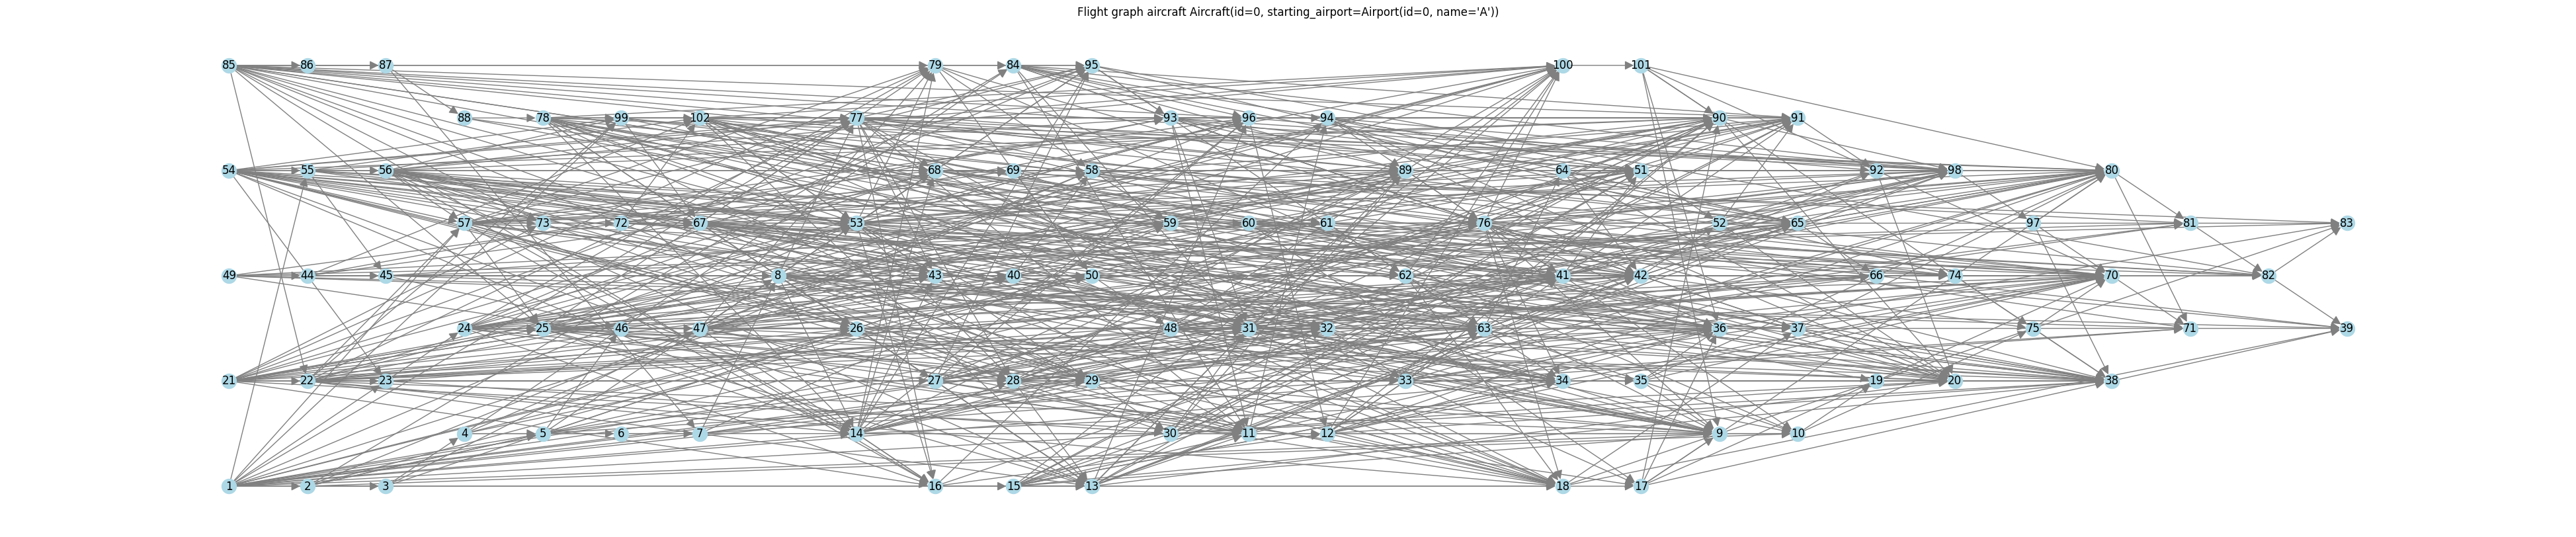

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

In [9]:
problem = FlightProblem.from_file(problem_path(0.5,10,7,0))
solution = FlightSolution.from_file(solution_path(0.5,10,7,0), problem)

reporter.plot_solution_graph(solution)